Lets explore our TMDB files

In [6]:
# Import library
import pandas as pd

In [7]:
# read the file 
tmdb_df = pd.read_csv("zippedData/tmdb.movies.csv.gz")
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Notice how the genres have an id number. We can attempt to us an TMDB API to get the definitions of the genres

In [47]:
import requests
import json
import key

url = "https://api.themoviedb.org/3/genre/movie/list?language=en"
key = key.api_key

headers = {
    "Authorization": f"Bearer {key}",
    "accept": "application/json"
}

response = requests.get(url, headers=headers)
print(response.text)

{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}


It retrieved a nested dictionary so we can attempt to create a map for genred and id numbers

In [48]:
genre_dict = response.json()
genre_dict

{'genres': [{'id': 28, 'name': 'Action'},
  {'id': 12, 'name': 'Adventure'},
  {'id': 16, 'name': 'Animation'},
  {'id': 35, 'name': 'Comedy'},
  {'id': 80, 'name': 'Crime'},
  {'id': 99, 'name': 'Documentary'},
  {'id': 18, 'name': 'Drama'},
  {'id': 10751, 'name': 'Family'},
  {'id': 14, 'name': 'Fantasy'},
  {'id': 36, 'name': 'History'},
  {'id': 27, 'name': 'Horror'},
  {'id': 10402, 'name': 'Music'},
  {'id': 9648, 'name': 'Mystery'},
  {'id': 10749, 'name': 'Romance'},
  {'id': 878, 'name': 'Science Fiction'},
  {'id': 10770, 'name': 'TV Movie'},
  {'id': 53, 'name': 'Thriller'},
  {'id': 10752, 'name': 'War'},
  {'id': 37, 'name': 'Western'}]}

In [49]:
genre_mapping = {}
for genre in genre_dict['genres']:
    genre_mapping[genre['id']] = genre['name']

print(genre_mapping)

{28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy', 80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family', 14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'}


Now that we have a guide 

In [50]:
# Function to map genre IDs to genre names
def map_genres(genre_ids):
    return [genre_mapping.get(genre_id) for genre_id in genre_ids if genre_mapping.get(genre_id)]

In [51]:
import ast

def parse_list_string(s):
    try:
        return ast.literal_eval(s)
    except (SyntaxError, ValueError):
        return []

# Convert the genre_ids column from string representation to list
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(parse_list_string)

# Update the genre_ids column with the corresponding genre names
tmdb_df['genre_ids'] = tmdb_df['genre_ids'].apply(lambda ids: [genre_mapping.get(int(id)) for id in ids])

# Print the updated DataFrame
tmdb_df

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[Adventure, Fantasy, Family]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[Fantasy, Adventure, Animation, Family]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[Adventure, Action, Science Fiction]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[Animation, Comedy, Family]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[Action, Science Fiction, Adventure]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[Horror, Drama]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[Drama, Thriller]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[Fantasy, Action, Adventure]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[Family, Adventure, Action]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Now that the genre_ids are swapped out with there actual genre_name we can start cleaning the uneccessary variables in this dataframe 

In [52]:
tmdb_drop= tmdb_df.drop(["Unnamed: 0", "id", "original_language"], axis=1, inplace=False)
tmdb_drop

,genre_ids,original_title,popularity,release_date,title,vote_average,vote_count
0,"[Adventure, Fantasy, Family]",Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[Fantasy, Adventure, Animation, Family]",How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[Adventure, Action, Science Fiction]",Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[Animation, Comedy, Family]",Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[Action, Science Fiction, Adventure]",Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...
26512,"[Horror, Drama]",Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[Drama, Thriller]",_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[Fantasy, Action, Adventure]",The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[Family, Adventure, Action]",Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


Now lets check how many missing data values there are in this data frame

In [53]:
nan_values = tmdb_drop.isnull().sum()
nan_values

genre_ids         0
original_title    0
popularity        0
release_date      0
title             0
vote_average      0
vote_count        0
dtype: int64

It seems that there are no NaN values which allows us to move forward to data analysis. 

According to TMDB the popularity column is actually very important.

The following is there description of the popularity column: 

"""

Popularity is a fairly important metric here on TMDB. It helps us boost search results, adds an incredibly useful sort value for discover, and is also just kind of fun to see items chart up and down. You can think of popularity as being a "lifetime" popularity score that is impacted by the attributes below. It's calculated quite differently than trending.

Each model builds their popularity value slightly differently. Here are some of the attributes we use for each media type.

Movies
- Number of votes for the day
- Number of views for the day
- Number of users who marked it as a "favourite" for the day
- Number of users who added it to their "watchlist" for the day
- Release date
- Number of total votes
- Previous days score

"""

https://developer.themoviedb.org/docs/popularity-and-trending 

The popularity score is basically a combination of many factors that we can find already in the data csv. Because there is some factors we do not have but TMDB considred and calculated for us, the popularity score is essential to determinig genre vs popularity for a general audience. 

Attempt to create a bar graph showing which genres are the most popular based on average vote. 

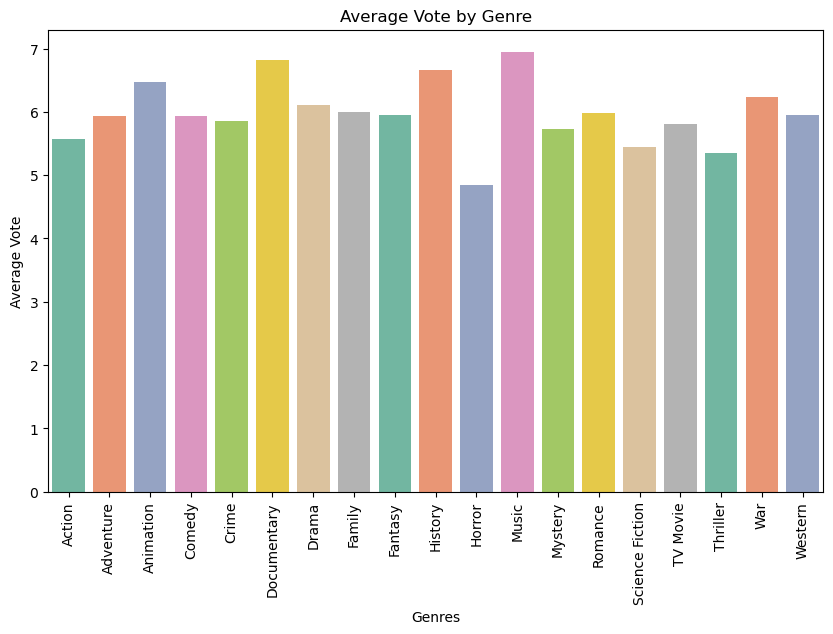

In [54]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Explode the 'genre_ids' column to convert lists into separate rows
df_exploded = tmdb_drop.explode('genre_ids')

# Convert 'vote_average' column to numeric
df_exploded['vote_average'] = pd.to_numeric(df_exploded['vote_average'], errors='coerce')

# Group the DataFrame by each genre
genre_groups = df_exploded.groupby('genre_ids')

# Calculate the average vote for each genre
genre_avg_vote = genre_groups['vote_average'].mean().reset_index()

# Plot the bar graph with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_avg_vote, x='genre_ids', y='vote_average', palette='Set2')
plt.xlabel('Genres')
plt.ylabel('Average Vote')
plt.title('Average Vote by Genre')
plt.xticks(rotation=90)
plt.show()


It seems that the average vote is not very useful. We can see how Horror is the lowest out of the genres. This unfortunately is not the best analysis to find out if genre and audience thought correlate. 

Now lets attempt to do the same for popularity score 

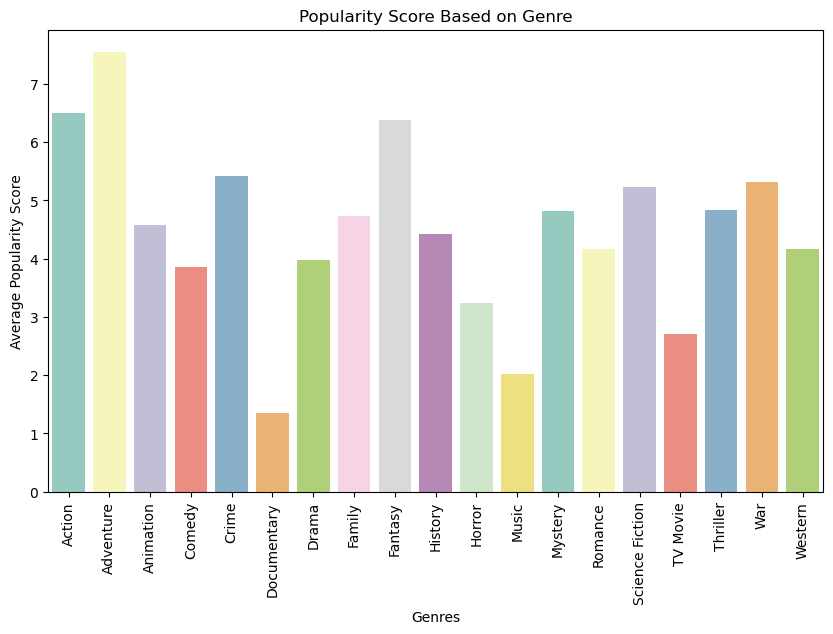

In [55]:
# Convert 'vote_average' column to numeric
df_exploded['popularity'] = pd.to_numeric(df_exploded['popularity'], errors='coerce')

# Group the DataFrame by each genre
genre_groups = df_exploded.groupby('genre_ids')

# Calculate the average popularity for each genre
genre_avg_pop = genre_groups['popularity'].mean().reset_index()

# Plot the bar graph with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_avg_pop, x='genre_ids', y='popularity', palette='Set3')
plt.xlabel('Genres')
plt.ylabel('Average Popularity Score')
plt.title('Popularity Score Based on Genre')
plt.xticks(rotation=90)
plt.show()

I was not able to find what defines a good score on TMDB however on their website there are green, yellow and red circles around the score. I also do not know the cutoffs. It seems based off the website when I was exploring that 70 and above is green, 69 -> 40 is yellow, and 39 and below is red. That being said lets filter excellent, good, and bad genres based on popularity. 

We can see how Adventure is the only one above 70 which is excellent.

We have Action, Animation, Crime, Drama, Family, Fantasy, History, Mystery, Romance, Science Fiction, Thriller, War, and Western as good genres.

Lastly Comedy, Horror, Music, TV Movie are classified as bad genres. 

***First reccomendation is to stick to movie productions within the genres of Adventure, History, Mystery, Romance, Science Fiction, Thriller, War, and Western. These genres have the highest popularity.***

Now lets take a look at the datasets with budgets so we can determine return on investments.

In [56]:
bom_df = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom_df

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


There seems to be no genre in this dataset. Creating an insight from this is not possible. It does contain domestic and gross values. That being said lets take a look at the tn.movie_budgets file 

In [57]:
tn_movie_df = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")
tn_movie_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


This dataset contains release dates which can be useful in exploring what time of the year do movies make the most money.

Lets look at the rottentomates datasets and see what information can be useful for insights

In [58]:
rt_movie_info_df = pd.read_csv("zippedData/rt.movie_info.tsv.gz", delimiter='\t')
rt_movie_info_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


There seems to be 1560 movies in this dataset. It includes genres and some box_office gross values. It also includes a date.

In [59]:
rt_reviews_df = pd.read_csv("zippedData/rt.reviews.tsv.gz", delimiter='\t', encoding='latin1')
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


Combine both dataframes into a single dataframe

In [60]:
# Create a merged df where the reviews are grouped with the correct movie id
merged_rt_df = rt_movie_info_df.merge(rt_reviews_df, on='id')
merged_rt_df

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54427,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,"Suspended from the force, Paris cop Hubert is ...",R,Action and Adventure|Art House and Internation...,NaN,Luc Besson,"Sep 27, 2001","Feb 11, 2003",NaN,NaN,94 minutes,Columbia Pictures,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


Lets check the dataframe for any NaN values

In [61]:
x = merged_rt_df.isnull().sum()
x

id                  0
synopsis          132
rating_x           86
genre              87
director         5440
writer           9226
theater_date     1226
dvd_date         1226
currency        21122
box_office      21122
runtime           838
studio          14307
review           5563
rating_y        13517
fresh               0
critic           2722
top_critic          0
publisher         309
date                0
dtype: int64

it seems that the column of interest which was box_office has 21122 missing values. Since this data is based on a movie and not something general we can't neccessarily impute a value. The best decision is to drop those NaN values. 

In [62]:
# For reference lets calculate the percentage the NaN values make up for box_office
import numpy as np

percentage = (len(merged_rt_df['box_office']) - x['box_office']) / len(merged_rt_df['box_office']) * 100 
percentage.round(2)

61.2

The percentage is 62.2% suggesting that it is statistically a significant portion of the dataset. As mentioned above we can not impute a value to substitute since the revenue is based on a movie. 

In [63]:
df_rt_copy = merged_rt_df.copy()
df_rt = df_rt_copy.dropna(subset=['box_office'], axis=0, inplace=False)
df_rt.head()

,id,synopsis,rating_x,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,review,rating_y,fresh,critic,top_critic,publisher,date
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


Now that we have gotten rid of the box_office NaN values lets double check our genre NaN values

In [64]:
df_rt.isnull().sum()

id                 0
synopsis           0
rating_x           0
genre              0
director        3942
writer          5676
theater_date     111
dvd_date         111
currency           0
box_office         0
runtime          182
studio          2343
review          1153
rating_y        7772
fresh              0
critic          1225
top_critic         0
publisher        206
date               0
dtype: int64

It seems that we are good to go with our most important columns of interst which are genre, box_office, and currency. For now lets drop irrelevant columns. 

In [65]:
df_rt_dropped = df_rt.drop(['synopsis', 'dvd_date', 'studio', 'publisher', 'date'], axis=1, inplace = False)
df_rt_dropped.head(10)

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,review,rating_y,fresh,critic,top_critic
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0
1,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0
2,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0
3,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0
4,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,... a perverse twist on neorealism...,NaN,fresh,NaN,0
5,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,... Cronenberg's Cosmopolis expresses somethin...,NaN,fresh,Michelle Orange,0
6,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,"Quickly grows repetitive and tiresome, meander...",C,rotten,Eric D. Snider,0
7,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,Cronenberg is not a director to be daunted by ...,2/5,rotten,Matt Kelemen,0
8,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,"Cronenberg's cold, exacting precision and emot...",NaN,fresh,Sean Axmaker,0
9,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,Over and above its topical urgency or the bit ...,NaN,fresh,Kong Rithdee,0


Lets check the datatype for the genre 

In [66]:
print(df_rt_dropped.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33310 entries, 0 to 54317
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            33310 non-null  int64 
 1   rating_x      33310 non-null  object
 2   genre         33310 non-null  object
 3   director      29368 non-null  object
 4   writer        27634 non-null  object
 5   theater_date  33199 non-null  object
 6   currency      33310 non-null  object
 7   box_office    33310 non-null  object
 8   runtime       33128 non-null  object
 9   review        32157 non-null  object
 10  rating_y      25538 non-null  object
 11  fresh         33310 non-null  object
 12  critic        32085 non-null  object
 13  top_critic    33310 non-null  int64 
dtypes: int64(2), object(12)
memory usage: 3.8+ MB
None


We know that the genre is an object however in the df it seems like a string

In [67]:
genre_type = type(df_rt_dropped['genre'][1])
print(genre_type)

<class 'str'>


It seems that the main challenge for this route would be to seperate the string is genres itself. The entire datatype is a single string. Unfortunately for the sake of time and lack of experience I will not go this route. 

We can do analsis with the box_office and rating_x. To do this we got to make sure our movies are not duplicating since our merged dataframe includes reviews for a single movie. 

In [68]:
drop_duplicate_rt = df_rt_dropped.copy()
rt_nonduplicate_rt = drop_duplicate_rt.drop_duplicates(subset='id', keep='first')
rt_nonduplicate_rt

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,review,rating_y,fresh,critic,top_critic
0,3,R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012",$,"600,000",108 minutes,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0
318,10,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002",$,"41,032,915",82 minutes,"It won't stick with you forever, but you will ...",3/5,fresh,NaN,0
426,13,R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006",$,"224,114",123 minutes,"Subtle and understated, a meditation on morali...",3.5/4,fresh,Jeff Simon,0
521,14,R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010",$,"134,904",117 minutes,A captivating film... [Full review in Spanish],3/5,fresh,Laura Hiros,0
726,23,R,Drama,NaN,NaN,"Dec 20, 2013",$,"99,165,609",129 minutes,The movie is great. It is interesting without ...,8/10,fresh,Debbie Baldwin,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53563,1976,NR,Action and Adventure|Art House and International,Ciro Guerra,Ciro Guerra|Jacques Toulemonde Vidal,"Feb 17, 2016",$,"1,320,005",123 minutes,"The young director, Ciro Guerra, working from ...",NaN,rotten,NaN,0
53717,1980,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005",$,"25,335,935",119 minutes,"Thank you, [Joss], for creating this world, fo...",1,fresh,Aaron Peterson,0
53887,1981,NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012",$,"1,416,189",129 minutes,A capable supporting cast and a fun cameo from...,3/5,fresh,Anil Sinanan,1
53891,1986,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002",$,"794,306",97 minutes,...dourly delightful.,3.5/4,fresh,Josh Larsen,0


Check for any NaN values in our rating_x column as well as box_office

In [69]:
rt_nonduplicate_rt.isnull().sum()

id                0
rating_x          0
genre             0
director         37
writer           58
theater_date      3
currency          0
box_office        0
runtime           2
review            0
rating_y        114
fresh             0
critic            4
top_critic        0
dtype: int64

It seems that our columns of interest do not have any NaN values which allows us to proceed with data organization

In [78]:
rt_grouped = rt_nonduplicate_rt.sort_values(by='rating_x')
rt_grouped

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,review,rating_y,fresh,critic,top_critic
22404,903,G,Comedy|Documentary|Science Fiction and Fantasy...,James Cameron,NaN,"Apr 11, 2003",$,"16,302,332",59 minutes,Cameron reconstructs life aboard in the shape ...,NaN,fresh,Alexander Walker,0
38614,1488,G,Animation|Kids and Family|Science Fiction and ...,Ben Stassen,Domonic Paris|Dominic Paris,"Aug 15, 2008",$,"13,592,311",84 minutes,... a very boring children's movie... [Full re...,2/5,rotten,Laura Hiros,0
31475,1239,G,Animation|Kids and Family,Frank Nissen,Brian Hohlfeld|Evan Spiliotopoulos,"Feb 11, 2005",$,"18,013,938",67 minutes,"There's not a scrap of Milne left, at this point.",5/10,rotten,Tim Brayton,0
14987,596,G,Documentary|Special Interest,Adam Ravetch|Sarah Robertson,Linda Woolverton|Mose Richards|Kristin Gore,"Aug 17, 2007",$,"598,103",86 minutes,"It's a playful study of Arctic life, starring ...",3/4,fresh,Debbie Day,1
41136,1554,G,Kids and Family|Musical and Performing Arts,Britt Allcroft,Britt Allcroft,"Jul 26, 2000",$,"2,027,042",95 minutes,"Will please its many fans, but plot might conf...",3/5,fresh,Nell Minow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23980,970,R,Art House and International|Comedy|Drama,Francis Veber,Francis Veber,"May 4, 2001",$,"4,519,967",85 minutes,"While there are laughs to be had, on a whole V...",1.5/4,rotten,Sara Michelle,0
24073,973,R,Action and Adventure|Horror|Science Fiction an...,Andrzej Bartkowiak,Dave Callaham|Wesley Strick,"Oct 21, 2005",$,"28,031,250",104 minutes,The unnecessarily embellished storyline and dr...,NaN,rotten,Marisa Mirabal,0
24241,976,R,Drama,Patty Jenkins,Patty Jenkins,"Jan 9, 2004",$,"34,187,787",109 minutes,"Powerful, painful for mature audiences only.",3/5,fresh,Nell Minow,0
21560,858,R,Drama,Jed Weintrob,Jed Weintrob|Andrew Osborne,"Sep 24, 2003",$,"25,658",93 minutes,"A [reasonably] compelling, refreshingly non-ju...",NaN,fresh,Andrew Wright,0


Now that we have our data sorted by rating_x we can take a look which rating made the most box_office money 

In [79]:
for movie in rt_grouped:
    # Create a rating list where they do not duplicate
    rating = []
    for letter in rt_grouped['rating_x']:
        rating.append(letter)
    rating = list(set(rating))
# Convert our box_office value datatype to numeric since it is a string
rt_grouped['box_office'] = rt_grouped['box_office'].str.replace(',', '')
rt_grouped['box_office'] = rt_grouped['box_office'].astype(float)
# Calculate the average per rating
avg_box_office_rating = rt_grouped.groupby('rating_x')['box_office'].mean()

print(rating)
print(avg_box_office_rating)

['PG-13', 'NR', 'PG', 'G', 'R']
rating_x
G        2.284580e+07
NR       6.628353e+05
PG       5.045734e+07
PG-13    5.603056e+07
R        2.554368e+07
Name: box_office, dtype: float64


It seems that we actually have a NR rating suggetsing that the movie was not rated at all. This information should be droped from the dataframe. 

In [80]:
rating_to_drop = 'NR'
rt_grouped = rt_grouped.drop(rt_grouped[rt_grouped['rating_x'] == rating_to_drop].index)
rt_grouped

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,review,rating_y,fresh,critic,top_critic
22404,903,G,Comedy|Documentary|Science Fiction and Fantasy...,James Cameron,NaN,"Apr 11, 2003",$,16302332.0,59 minutes,Cameron reconstructs life aboard in the shape ...,NaN,fresh,Alexander Walker,0
38614,1488,G,Animation|Kids and Family|Science Fiction and ...,Ben Stassen,Domonic Paris|Dominic Paris,"Aug 15, 2008",$,13592311.0,84 minutes,... a very boring children's movie... [Full re...,2/5,rotten,Laura Hiros,0
31475,1239,G,Animation|Kids and Family,Frank Nissen,Brian Hohlfeld|Evan Spiliotopoulos,"Feb 11, 2005",$,18013938.0,67 minutes,"There's not a scrap of Milne left, at this point.",5/10,rotten,Tim Brayton,0
14987,596,G,Documentary|Special Interest,Adam Ravetch|Sarah Robertson,Linda Woolverton|Mose Richards|Kristin Gore,"Aug 17, 2007",$,598103.0,86 minutes,"It's a playful study of Arctic life, starring ...",3/4,fresh,Debbie Day,1
41136,1554,G,Kids and Family|Musical and Performing Arts,Britt Allcroft,Britt Allcroft,"Jul 26, 2000",$,2027042.0,95 minutes,"Will please its many fans, but plot might conf...",3/5,fresh,Nell Minow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23980,970,R,Art House and International|Comedy|Drama,Francis Veber,Francis Veber,"May 4, 2001",$,4519967.0,85 minutes,"While there are laughs to be had, on a whole V...",1.5/4,rotten,Sara Michelle,0
24073,973,R,Action and Adventure|Horror|Science Fiction an...,Andrzej Bartkowiak,Dave Callaham|Wesley Strick,"Oct 21, 2005",$,28031250.0,104 minutes,The unnecessarily embellished storyline and dr...,NaN,rotten,Marisa Mirabal,0
24241,976,R,Drama,Patty Jenkins,Patty Jenkins,"Jan 9, 2004",$,34187787.0,109 minutes,"Powerful, painful for mature audiences only.",3/5,fresh,Nell Minow,0
21560,858,R,Drama,Jed Weintrob,Jed Weintrob|Andrew Osborne,"Sep 24, 2003",$,25658.0,93 minutes,"A [reasonably] compelling, refreshingly non-ju...",NaN,fresh,Andrew Wright,0


In [106]:
rating = []
# Update the list with new dataframe ratings
for movie in rt_grouped:
    # Create a rating list where they do not duplicate
    for letter in rt_grouped['rating_x']:
        rating.append(letter)
    rating = list(set(rating))
# Calculate the average per rating
avg_box_office_rating = rt_grouped.groupby('rating_x')['box_office'].mean()
print(avg_box_office_rating)
print(rating)

rating_x
G        2.284580e+07
PG       5.045734e+07
PG-13    5.603056e+07
R        2.554368e+07
Name: box_office, dtype: float64
['PG', 'G', 'PG-13', 'R']


Now lets make a boxplot to visualize the distribution. Also realized how the for loop was not needed since the aggregation came with an index and value. 

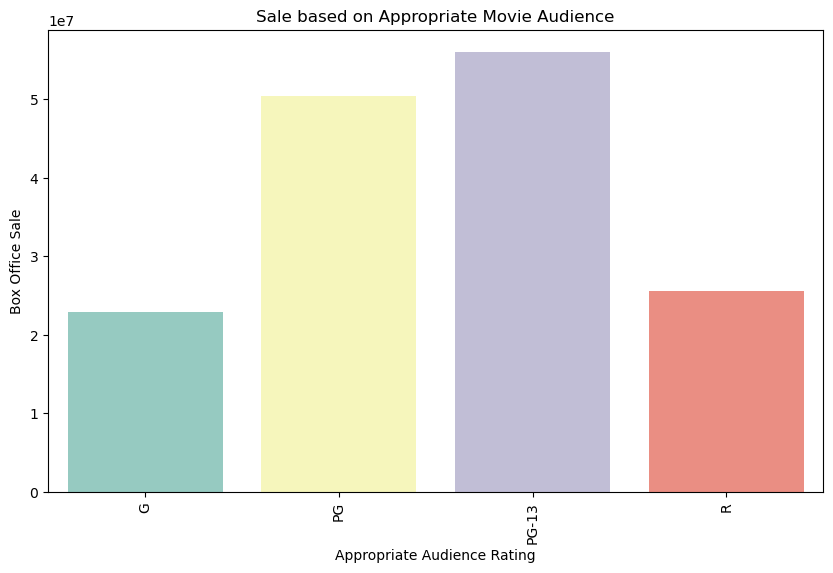

In [107]:
# Plot the bar graph with Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_box_office_rating.index, y=avg_box_office_rating.values, palette='Set3')
plt.xlabel('Appropriate Audience Rating')
plt.ylabel('Box Office Sale')
plt.title('Sale based on Appropriate Movie Audience')
plt.xticks(rotation=90)
plt.show()

We can see how PG and PG-13 made the most money at the box office. 

Deos the month of the year impact the amount of money made at the box office? 

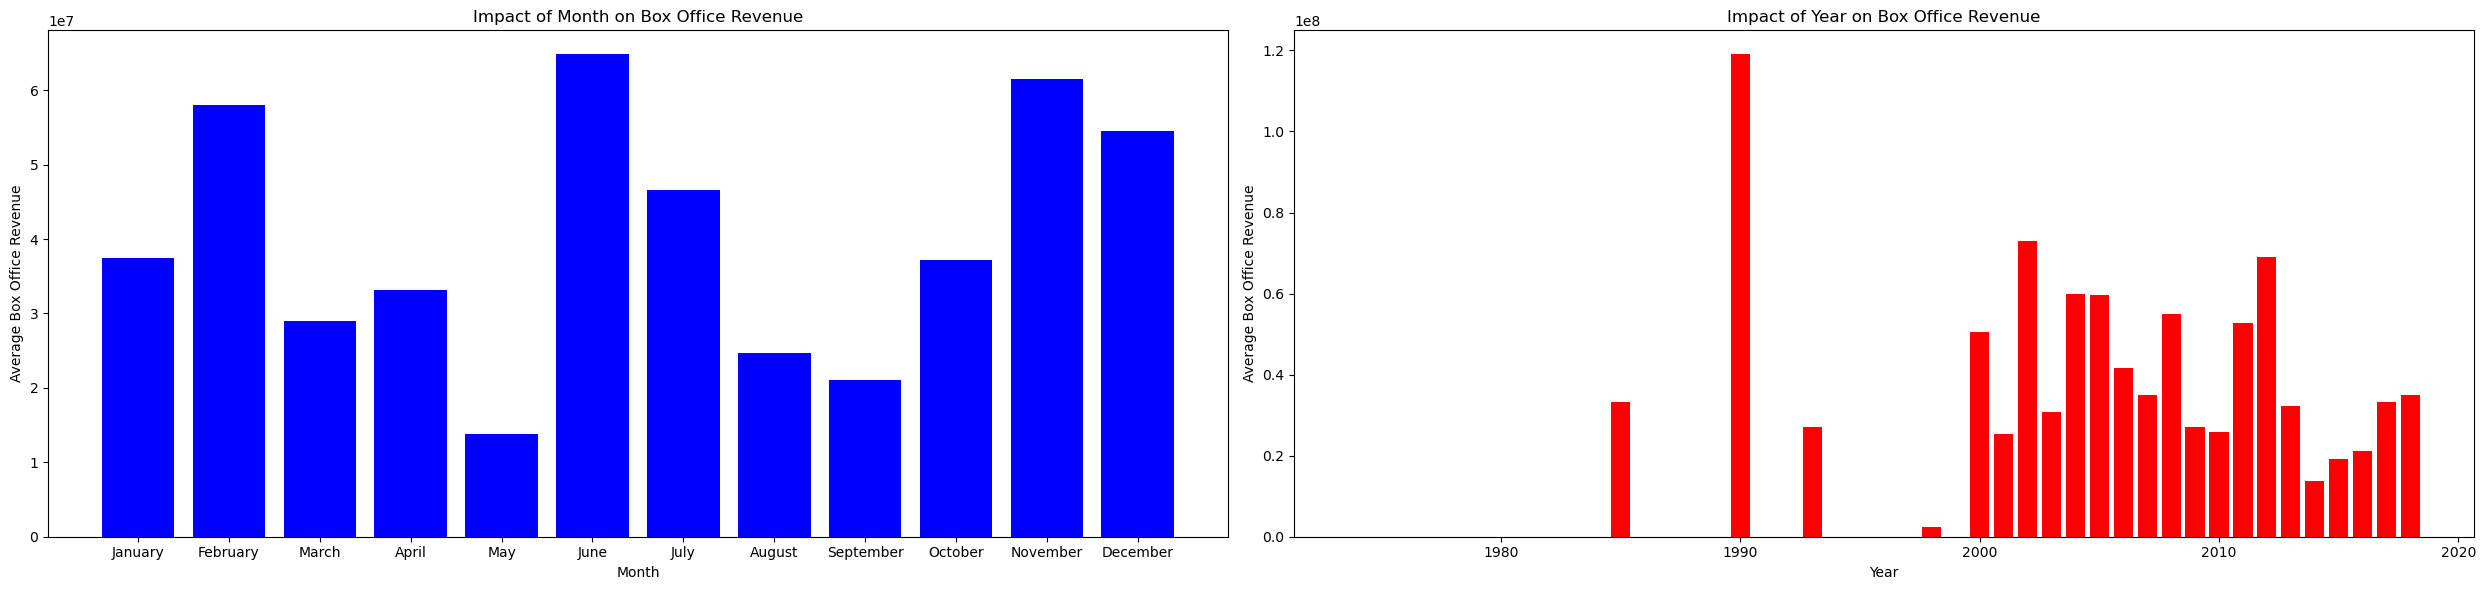

In [115]:
import calendar
# Convert 'theater_date' column to datetime format
rt_grouped['theater_date'] = pd.to_datetime(rt_grouped['theater_date'], format='%b %d, %Y')

# Extract the month from 'theater_date'
rt_grouped['month'] = rt_grouped['theater_date'].dt.month
# Extract the year from 'theater_date'
rt_grouped['year'] = rt_grouped['theater_date'].dt.year
# Group the data by month and calculate the average box office revenue
avg_box_office_month = rt_grouped.groupby('month')['box_office'].mean()
# Group the data by year and average box office revenue
avg_box_office_year = rt_grouped.groupby('year')['box_office'].mean()
# Get Month Names 
month_names = [calendar.month_name[i] for i in range(1, 13)]
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(25, 6))

# Plot the average box office revenue by month
ax1.bar(month_names, avg_box_office_month.values, color='b')
ax1.set_xlabel('Month')
ax1.set_ylabel('Average Box Office Revenue')
ax1.set_title('Impact of Month on Box Office Revenue')

# Plot the average box office revenue by year
ax2.bar(avg_box_office_year.index, avg_box_office_year.values, color='r')
ax2.set_xlabel('Year')
ax2.set_ylabel('Average Box Office Revenue')
ax2.set_title('Impact of Year on Box Office Revenue')

plt.tight_layout()
plt.show()

It seems that the best times to release movies are February, June, July, November, and December according to Rotten Tomatoes. It also seems that as of right now the trend is declining when it comes to yeas. It also seems just on spectualtion that another peak is soon to come. 

Lets explore in general from two sets of data what time of the year can be a good time to release movies. We will condider the tn.movie_budgets and this cleaned rotten tomato df

In [99]:
tn_movie_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [168]:
tn_movie_copy = tn_movie_df.copy()

In [169]:
rt_grouped

,id,rating_x,genre,director,writer,theater_date,currency,box_office,runtime,review,rating_y,fresh,critic,top_critic,month,year
22404,903,G,Comedy|Documentary|Science Fiction and Fantasy...,James Cameron,NaN,2003-04-11,$,16302332.0,59 minutes,Cameron reconstructs life aboard in the shape ...,NaN,fresh,Alexander Walker,0,4.0,2003.0
38614,1488,G,Animation|Kids and Family|Science Fiction and ...,Ben Stassen,Domonic Paris|Dominic Paris,2008-08-15,$,13592311.0,84 minutes,... a very boring children's movie... [Full re...,2/5,rotten,Laura Hiros,0,8.0,2008.0
31475,1239,G,Animation|Kids and Family,Frank Nissen,Brian Hohlfeld|Evan Spiliotopoulos,2005-02-11,$,18013938.0,67 minutes,"There's not a scrap of Milne left, at this point.",5/10,rotten,Tim Brayton,0,2.0,2005.0
14987,596,G,Documentary|Special Interest,Adam Ravetch|Sarah Robertson,Linda Woolverton|Mose Richards|Kristin Gore,2007-08-17,$,598103.0,86 minutes,"It's a playful study of Arctic life, starring ...",3/4,fresh,Debbie Day,1,8.0,2007.0
41136,1554,G,Kids and Family|Musical and Performing Arts,Britt Allcroft,Britt Allcroft,2000-07-26,$,2027042.0,95 minutes,"Will please its many fans, but plot might conf...",3/5,fresh,Nell Minow,0,7.0,2000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23980,970,R,Art House and International|Comedy|Drama,Francis Veber,Francis Veber,2001-05-04,$,4519967.0,85 minutes,"While there are laughs to be had, on a whole V...",1.5/4,rotten,Sara Michelle,0,5.0,2001.0
24073,973,R,Action and Adventure|Horror|Science Fiction an...,Andrzej Bartkowiak,Dave Callaham|Wesley Strick,2005-10-21,$,28031250.0,104 minutes,The unnecessarily embellished storyline and dr...,NaN,rotten,Marisa Mirabal,0,10.0,2005.0
24241,976,R,Drama,Patty Jenkins,Patty Jenkins,2004-01-09,$,34187787.0,109 minutes,"Powerful, painful for mature audiences only.",3/5,fresh,Nell Minow,0,1.0,2004.0
21560,858,R,Drama,Jed Weintrob,Jed Weintrob|Andrew Osborne,2003-09-24,$,25658.0,93 minutes,"A [reasonably] compelling, refreshingly non-ju...",NaN,fresh,Andrew Wright,0,9.0,2003.0


We can extract the year and month from the tn dataset so we can do analysis for both month and year and this will allow us to merge the rotten tomatoes df as well 

In [170]:
# Convert 'release_date' column to datetime format
tn_movie_copy['release_date'] = pd.to_datetime(tn_movie_copy['release_date'], format='%b %d, %Y')

# Extract month and year
tn_movie_copy['month'] = tn_movie_copy['release_date'].dt.month
tn_movie_copy['year'] = tn_movie_copy['release_date'].dt.year

tn_movie_copy

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,year
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279",12,2009
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875",5,2011
2,3,2019-06-07,Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350",6,2019
3,4,2015-05-01,Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963",5,2015
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747",12,2017
...,...,...,...,...,...,...,...,...
5777,78,2018-12-31,Red 11,"$7,000",$0,$0,12,2018
5778,79,1999-04-02,Following,"$6,000","$48,482","$240,495",4,1999
5779,80,2005-07-13,Return to the Land of Wonders,"$5,000","$1,338","$1,338",7,2005
5780,81,2015-09-29,A Plague So Pleasant,"$1,400",$0,$0,9,2015


Now lets drop columns we do not need for analysis for both df

In [171]:
rt_grouped_copy = rt_grouped.copy()

rt_grouped_copy.drop(['id', 'rating_x',	'genre', 'director', 'writer', 'theater_date', 'currency', 'fresh', 'rating_y', 'review', 'critic', 'top_critic', 'runtime'], axis=1, inplace=True)
rt_grouped_copy

,box_office,month,year
22404,16302332.0,4.0,2003.0
38614,13592311.0,8.0,2008.0
31475,18013938.0,2.0,2005.0
14987,598103.0,8.0,2007.0
41136,2027042.0,7.0,2000.0
...,...,...,...
23980,4519967.0,5.0,2001.0
24073,28031250.0,10.0,2005.0
24241,34187787.0,1.0,2004.0
21560,25658.0,9.0,2003.0


In [172]:
tn_movie_copy.drop(['release_date', 'id', 'movie'], axis=1, inplace=True)
tn_movie_copy

,production_budget,domestic_gross,worldwide_gross,month,year
0,"$425,000,000","$760,507,625","$2,776,345,279",12,2009
1,"$410,600,000","$241,063,875","$1,045,663,875",5,2011
2,"$350,000,000","$42,762,350","$149,762,350",6,2019
3,"$330,600,000","$459,005,868","$1,403,013,963",5,2015
4,"$317,000,000","$620,181,382","$1,316,721,747",12,2017
...,...,...,...,...,...
5777,"$7,000",$0,$0,12,2018
5778,"$6,000","$48,482","$240,495",4,1999
5779,"$5,000","$1,338","$1,338",7,2005
5780,"$1,400",$0,$0,9,2015


Before we merge lets investigate the return on investment for this tn_movie_budget first 

In [173]:
tn_movie_copy.isnull().any()

production_budget    False
domestic_gross       False
worldwide_gross      False
month                False
year                 False
dtype: bool

In [174]:
# First chanage datatype since the 'numbers' are stored as strings
tn_movie_copy['production_budget'] = pd.to_numeric(tn_movie_copy['production_budget'].str.replace('[^\d.]', ''), errors='coerce')
tn_movie_copy['domestic_gross'] = pd.to_numeric(tn_movie_copy['domestic_gross'].str.replace('[^\d.]', ''), errors='coerce')
tn_movie_copy['worldwide_gross'] = pd.to_numeric(tn_movie_copy['worldwide_gross'].str.replace('[^\d.]', ''), errors='coerce')
tn_movie_copy


C:\Users\delga\AppData\Local\Temp\ipykernel_34524\2452647730.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tn_movie_copy['production_budget'] = pd.to_numeric(tn_movie_copy['production_budget'].str.replace('[^\d.]', ''), errors='coerce')
C:\Users\delga\AppData\Local\Temp\ipykernel_34524\2452647730.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  tn_movie_copy['domestic_gross'] = pd.to_numeric(tn_movie_copy['domestic_gross'].str.replace('[^\d.]', ''), errors='coerce')
C:\Users\delga\AppData\Local\Temp\ipykernel_34524\2452647730.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  tn_movie_copy['worldwide_gross'] = pd.to_numeric(tn_movie_copy['worldwide_gross'].str.replace('[^\d.]', ''), errors='coerce')


,production_budget,domestic_gross,worldwide_gross,month,year
0,425000000,760507625,2776345279,12,2009
1,410600000,241063875,1045663875,5,2011
2,350000000,42762350,149762350,6,2019
3,330600000,459005868,1403013963,5,2015
4,317000000,620181382,1316721747,12,2017
...,...,...,...,...,...
5777,7000,0,0,12,2018
5778,6000,48482,240495,4,1999
5779,5000,1338,1338,7,2005
5780,1400,0,0,9,2015


In [176]:
# Calculate ROI
tn_movie_copy['ROI_gross_domestic'] = tn_movie_copy['domestic_gross'] - tn_movie_copy['production_budget']
tn_movie_copy['ROI_gross_worldwide'] = tn_movie_copy['worldwide_gross'] - tn_movie_copy['production_budget']
tn_movie_copy

,production_budget,domestic_gross,worldwide_gross,month,year,ROI_gross_domestic,ROI_gross_worldwide
0,425000000,760507625,2776345279,12,2009,335507625,2351345279
1,410600000,241063875,1045663875,5,2011,-169536125,635063875
2,350000000,42762350,149762350,6,2019,-307237650,-200237650
3,330600000,459005868,1403013963,5,2015,128405868,1072413963
4,317000000,620181382,1316721747,12,2017,303181382,999721747
...,...,...,...,...,...,...,...
5777,7000,0,0,12,2018,-7000,-7000
5778,6000,48482,240495,4,1999,42482,234495
5779,5000,1338,1338,7,2005,-3662,-3662
5780,1400,0,0,9,2015,-1400,-1400


It seems some movies actually lost money. We need to sort group them and analyze how the year affects the movie.

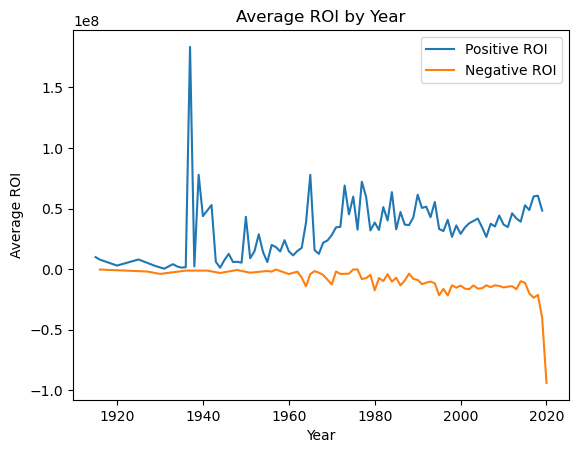

In [181]:
# Group the DataFrame by the sign of ROI_gross_domestic
grouped_positive_dom = tn_movie_copy.groupby(tn_movie_copy['ROI_gross_domestic'] >= 0)

# Calculate the ROI based on year for positive values
roi_positive = grouped_positive_dom.get_group(True).groupby('year')['ROI_gross_domestic'].mean()

# Calculate the ROI based on year for negative values
roi_negative = grouped_positive_dom.get_group(False).groupby('year')['ROI_gross_domestic'].mean()

# Plot the ROI by year
plt.plot(roi_positive.index, roi_positive.values, label='Positive ROI')
plt.plot(roi_negative.index, roi_negative.values, label='Negative ROI')
plt.xlabel('Year')
plt.ylabel('Average ROI')
plt.title('Average ROI Domestic by Year')
plt.legend()
plt.show()


When we plot the negative and positive ROI domestic we see how generally the movie production world is stable when it comes to loss except for when it came to 2020. There was a genral range of loss if for some reason a movie did bad. Overall Movies did good. Based off this its hard to predict if releasing movies in the future would be a good idea, let alone predict a certain year. 

Lets see if the month helps analyze movie release better. 

In [ ]:
# Calculate the ROI based on year for positive values
roi_positive_month = grouped_positive_dom.get_group(True).groupby('month')['ROI_gross_domestic'].mean()

# Calculate the ROI based on month for negative values
roi_negative = grouped_positive_dom.get_group(False).groupby('month')['ROI_gross_domestic'].mean()